## Assignment 1 (10%)

#### Submitted by: Aarjeyan Shrestha
#### Student ID: C0927422


In [ ]:
# importing  necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# reading the dataframe
df = pd.read_csv("fires.csv", low_memory=False)

In [3]:
# viewing the dataframe using head() function
df.head()

,FIRE_NAME,FIRE_SIZE,STATE,LATITUDE,LONGITUDE,FIRE_YEAR,discovery_date,contain_date
0,FOUNTAIN,0.10,CA,40.036944,-121.005833,2005,2005-02-02 00:00:00,2005-02-02 00:00:00
1,PIGEON,0.25,CA,38.933056,-120.404444,2004,2004-05-12 00:00:00,2004-05-12 00:00:00
2,SLACK,0.10,CA,38.984167,-120.735556,2004,2004-05-31 00:00:00,2004-05-31 00:00:00
3,DEER,0.10,CA,38.559167,-119.913333,2004,2004-06-28 00:00:00,2004-07-03 00:00:00
4,STEVENOT,0.10,CA,38.559167,-119.933056,2004,2004-06-28 00:00:00,2004-07-03 00:00:00


In [4]:
# viewing the shape of the dataframe
df.shape

(1880465, 8)

In [5]:
# checking the number of null values in the dataframe
df.isnull().sum()

FIRE_NAME         960479
FIRE_SIZE              0
STATE                  0
LATITUDE               0
LONGITUDE              0
FIRE_YEAR              0
discovery_date         0
contain_date      891531
dtype: int64

## (I) Explore the data:

#### Q1. Find the dimensions of the DF. Make the colnames lowercase.

In [6]:
#dimension of dataframe
print(df.shape)
#number of rows and columns in the dataframe
print(f"Number of Rows: {df.shape[0]}\nNumber of Columns: {df.shape[1]}\n")

(1880465, 8)
Number of Rows: 1880465
Number of Columns: 8



In [7]:
#checking the column names 
df.columns

Index(['FIRE_NAME', 'FIRE_SIZE', 'STATE', 'LATITUDE', 'LONGITUDE', 'FIRE_YEAR',
       'discovery_date', 'contain_date'],
      dtype='object')

In [8]:
#changing the column name  of a dataframe
df.columns = df.columns.str.lower()

In [9]:
df.columns

Index(['fire_name', 'fire_size', 'state', 'latitude', 'longitude', 'fire_year',
       'discovery_date', 'contain_date'],
      dtype='object')

#### Q2. Rename the column `fire_size` to `acres_burned`.

In [10]:
#renaming the column name "fire_size" to "acers_burned"
df.rename(columns={'fire_size':'acers_burned'},inplace=True)
#checking if the rename was successful
df.head()


,fire_name,acers_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
0,FOUNTAIN,0.10,CA,40.036944,-121.005833,2005,2005-02-02 00:00:00,2005-02-02 00:00:00
1,PIGEON,0.25,CA,38.933056,-120.404444,2004,2004-05-12 00:00:00,2004-05-12 00:00:00
2,SLACK,0.10,CA,38.984167,-120.735556,2004,2004-05-31 00:00:00,2004-05-31 00:00:00
3,DEER,0.10,CA,38.559167,-119.913333,2004,2004-06-28 00:00:00,2004-07-03 00:00:00
4,STEVENOT,0.10,CA,38.559167,-119.933056,2004,2004-06-28 00:00:00,2004-07-03 00:00:00


#### Q3. Convert the data in the `fire_name` column such that the data starts with a capital letter. (ie `PIGEON LAKE` -> `Pigeon lake`)

In [11]:
# Capitalizing values in fire_name column
df["fire_name"] = df["fire_name"].str.capitalize()

#checking the updated values
df.fire_name


0                           Fountain
1                             Pigeon
2                              Slack
3                               Deer
4                           Stevenot
                     ...            
1880460                     Odessa 2
1880461                          NaN
1880462                          NaN
1880463                          NaN
1880464    Barker bl  big_bear_lake_
Name: fire_name, Length: 1880465, dtype: object

#### Q4. Drop unnecessary rows- having fire size less than 10 acres.

In [12]:
#dropping the rows whose fire_size/now:acers_burned is less than 10 acers
df = df.drop(df[df["acers_burned"] < 10].index)

#viewing  the data after dropping the rows 
df

,fire_name,acers_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
16,Power,16823.0,CA,38.523333,-120.211667,2004,2004-10-06 00:00:00,2004-10-21 00:00:00
17,Freds,7700.0,CA,38.780000,-120.260000,2004,2004-10-13 00:00:00,2004-10-17 00:00:00
25,Bachelor,10.0,NM,33.315833,-105.512222,2004,2004-07-20 00:00:00,2004-07-20 00:00:00
37,Howard gap,50.3,NC,35.000278,-83.351111,2005,2005-01-27 00:00:00,2005-01-28 00:00:00
39,Austin creek,125.0,NC,36.001667,-81.590000,2005,2005-02-12 00:00:00,2005-02-13 00:00:00
...,...,...,...,...,...,...,...,...
1880387,Soda,24.0,CA,39.045908,-123.265522,2015,2015-07-04 00:00:00,2015-07-04 00:00:00
1880399,Gilman,73.0,CA,33.892120,-117.079065,2009,2009-05-03 00:00:00,2009-05-03 00:00:00
1880411,Terra,23.0,CA,35.985512,-118.915364,2009,2009-06-19 00:00:00,2009-06-19 00:00:00
1880419,Slaughterhouse,50.0,CA,32.906591,-116.942448,2010,2010-05-29 00:00:00,NaN


#### Q5. Drop duplicate rows, if any. If so, keep the first duplicate of each such duplicate set.

In [13]:
# dropping the duplicate rows by keeping the first duplicate
df.drop_duplicates(keep='first', inplace=True)

df

,fire_name,acers_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
16,Power,16823.0,CA,38.523333,-120.211667,2004,2004-10-06 00:00:00,2004-10-21 00:00:00
17,Freds,7700.0,CA,38.780000,-120.260000,2004,2004-10-13 00:00:00,2004-10-17 00:00:00
25,Bachelor,10.0,NM,33.315833,-105.512222,2004,2004-07-20 00:00:00,2004-07-20 00:00:00
37,Howard gap,50.3,NC,35.000278,-83.351111,2005,2005-01-27 00:00:00,2005-01-28 00:00:00
39,Austin creek,125.0,NC,36.001667,-81.590000,2005,2005-02-12 00:00:00,2005-02-13 00:00:00
...,...,...,...,...,...,...,...,...
1880387,Soda,24.0,CA,39.045908,-123.265522,2015,2015-07-04 00:00:00,2015-07-04 00:00:00
1880399,Gilman,73.0,CA,33.892120,-117.079065,2009,2009-05-03 00:00:00,2009-05-03 00:00:00
1880411,Terra,23.0,CA,35.985512,-118.915364,2009,2009-06-19 00:00:00,2009-06-19 00:00:00
1880419,Slaughterhouse,50.0,CA,32.906591,-116.942448,2010,2010-05-29 00:00:00,NaN


#### Q6. Ensure that the `date` columns have the correct datatype.

In [14]:
#checking the datatypes 
df.dtypes

fire_name          object
acers_burned      float64
state              object
latitude          float64
longitude         float64
fire_year           int64
discovery_date     object
contain_date       object
dtype: object

In [15]:
# converting the date columns to have correct datatype
df["discovery_date"] = pd.to_datetime(df["discovery_date"])
df["contain_date"] = pd.to_datetime(df["contain_date"])

#checking the data types after changin the date columns
df.dtypes

fire_name                 object
acers_burned             float64
state                     object
latitude                 float64
longitude                float64
fire_year                  int64
discovery_date    datetime64[ns]
contain_date      datetime64[ns]
dtype: object

#### Q7. Check for missing values in the `contain_date` column. Find the number.

#### a) Check for missing values of  `contain_date`  where fires exceed 10000 acres.

In [16]:
checkdf = df.copy()

In [17]:
# missing values in the contain_date column
print(f"The total missing value in contain_date is: {df["contain_date"].isnull().sum()}")


The total missing value in contain_date is: 136747


In [18]:
# missing values in contain_date column where fire exceeds 10000 acers
df[df["acers_burned"] > 10000].isnull().sum()

fire_name          30
acers_burned        0
state               0
latitude            0
longitude           0
fire_year           0
discovery_date      0
contain_date      263
dtype: int64

#### b) Check the values of  `contain_date` to see if they are reasonable.
#### Now explain whether you think the existing data is dependable or not, and whether you should/should not want to handle the missing data in `contain_date`.


In [19]:
# finding total value in dataframe
total_values = df.shape[0]
print(f"Total values in dataframe is: {total_values}")

# missing values in the contain_date column
print(f"The total missing value in contain_date is: {df["contain_date"].isnull().sum()}")

#percentage of the missing value in contain_date
missing_value_percentage = (df["contain_date"].isnull().sum()/df.shape[0])*100
print(f"Percentage of missing values in contain_date is :{missing_value_percentage} %")


Total values in dataframe is: 274123
The total missing value in contain_date is: 136747
Percentage of missing values in contain_date is :49.885270480769584 %


Since, the missing value in the contain_date is almost the half of the total datasets. We cannot  simply drop it because it's not a random missing data and we need to keep all the information for further analysis.
So, I tried to handle it by adding the mean value of the days_burned which is the difference in contain_date and discovery_date.

In [20]:
# calculating the days_burned  for each day
days_burned = (df['contain_date'] - df['discovery_date']).dt.days
# Since we are adding the mean value to each date, we keep it in a variable
avg_time = days_burned.mean()


In [21]:
# handling the missing value in contain_date with the mean of days_burned
df["contain_date"] = df["contain_date"].fillna(df["discovery_date"] + pd.to_timedelta(round(avg_time), unit='D'))

In [22]:
#checking the missing values in contain_date
print(f"Now the missing value in contain_date column is: {df["contain_date"].isnull().sum()}")

Now the missing value in contain_date column is: 0


## (II) Prepare the data:


#### Q9. Add the `fire_month` and `days_burning` columns

In [23]:
# creating the fire_month column
df["fire_month"] = df["discovery_date"].dt.month

In [24]:
# creating the days_burning column 
df['days_burning'] = df['contain_date'] - df['discovery_date']

In [25]:
df

,fire_name,acers_burned,state,latitude,longitude,fire_year,discovery_date,contain_date,fire_month,days_burning
16,Power,16823.0,CA,38.523333,-120.211667,2004,2004-10-06,2004-10-21,10,15 days
17,Freds,7700.0,CA,38.780000,-120.260000,2004,2004-10-13,2004-10-17,10,4 days
25,Bachelor,10.0,NM,33.315833,-105.512222,2004,2004-07-20,2004-07-20,7,0 days
37,Howard gap,50.3,NC,35.000278,-83.351111,2005,2005-01-27,2005-01-28,1,1 days
39,Austin creek,125.0,NC,36.001667,-81.590000,2005,2005-02-12,2005-02-13,2,1 days
...,...,...,...,...,...,...,...,...,...,...
1880387,Soda,24.0,CA,39.045908,-123.265522,2015,2015-07-04,2015-07-04,7,0 days
1880399,Gilman,73.0,CA,33.892120,-117.079065,2009,2009-05-03,2009-05-03,5,0 days
1880411,Terra,23.0,CA,35.985512,-118.915364,2009,2009-06-19,2009-06-19,6,0 days
1880419,Slaughterhouse,50.0,CA,32.906591,-116.942448,2010,2010-05-29,2010-06-01,5,3 days


In [26]:
#checking for null value for the new days_burning column
df["days_burning"].isnull().sum()

0

#### Q10. Get the statistical summary of the `days_burning` column. What trends do you see in the 3rd quartile, mean and Max length of the fires? Is or isn't anything fishy?

In [27]:
df["days_burning"].describe()

count                        274123
mean      3 days 03:03:40.512689559
std      11 days 08:45:16.525157806
min                 0 days 00:00:00
25%                 0 days 00:00:00
50%                 3 days 00:00:00
75%                 3 days 00:00:00
max              1881 days 00:00:00
Name: days_burning, dtype: object

From the above we can analyze that:
1. mean : 3 days 
2. standard deviation : 11 days
3. 1st quartile : 0 days
4. median : 3 days
5. 3rd quartile : 3 days
6. maximum length of days burned : 1881 days

We can  conclude from this analysis that there are some outliers in the days_burning column.

We plot the days_burning column to visualize the outliers

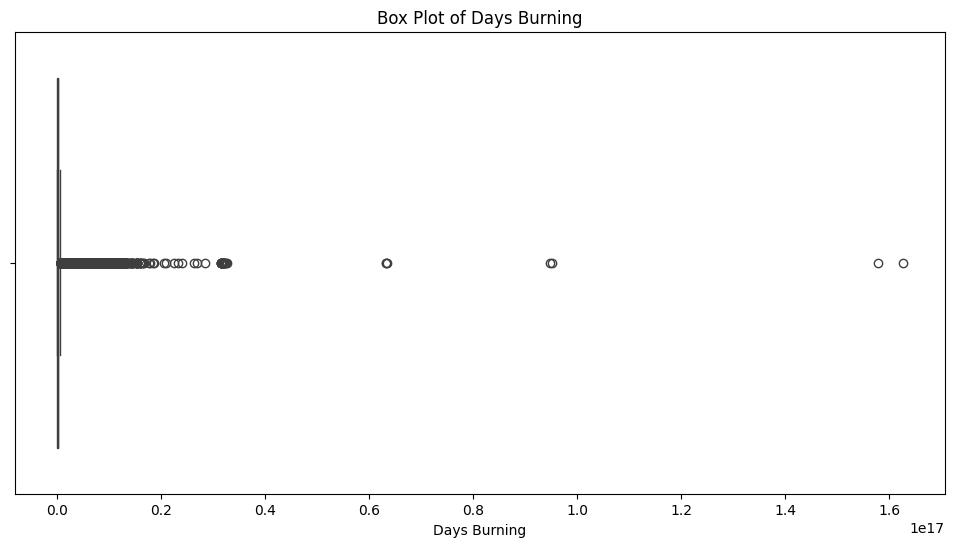

In [28]:
# plotting the value of days_burning to see an outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['days_burning'])
plt.xlabel('Days Burning')
plt.title('Box Plot of Days Burning')
plt.show()

After visualization, we can see that,
We can remove the days above 0.5(500 days) as an outliers

In [29]:
#checking the outliers
df[df["days_burning"].dt.days > 500]

,fire_name,acers_burned,state,latitude,longitude,fire_year,discovery_date,contain_date,fire_month,days_burning
305237,Kiliovilik,100.0,AK,66.566100,-157.519400,2001,2001-06-11,2004-06-16,6,1101 days
356156,Buenavista,120.0,CA,37.658900,-119.522800,2000,2000-08-07,2005-10-01,8,1881 days
357487,Road 09-08 wf,900.0,AL,34.449700,-85.597800,2006,2006-03-05,2008-03-09,3,735 days
738317,NaN,52.0,SC,32.220833,-81.008333,1994,1994-02-27,1999-02-28,2,1827 days
1227849,30305,250.0,OK,36.035600,-94.743133,2003,2003-03-25,2005-03-25,3,731 days
1276621,NaN,10.0,PA,40.017222,-79.827778,2002,2002-03-19,2005-03-19,3,1096 days
1324066,Jims branch,158.0,WV,37.511007,-81.349864,1994,1994-11-05,1996-11-06,11,732 days


#### Q11. Check the value of `days_burning` for fires that exceed 100 acres. What do you notice about the acreage and the `days_burning` for certain outliers?


In [30]:
# fire that exceeds 100 acers
df[df["acers_burned"] > 100][["days_burning"]]


,days_burning
16,15 days
17,4 days
39,1 days
116,1 days
117,0 days
...,...
1879825,0 days
1879892,3 days
1879968,3 days
1880293,2 days


In [31]:
#displaying the potential outliers in the dataframe
forsorting = df[df["acers_burned"] > 100][["days_burning"]]
forsorting.sort_values(by="days_burning",ascending=False).head(10)

,days_burning
356156,1881 days
357487,735 days
1324066,732 days
1227849,731 days
1286202,371 days
1572579,371 days
1579684,370 days
720670,370 days
1286272,369 days
1360116,368 days


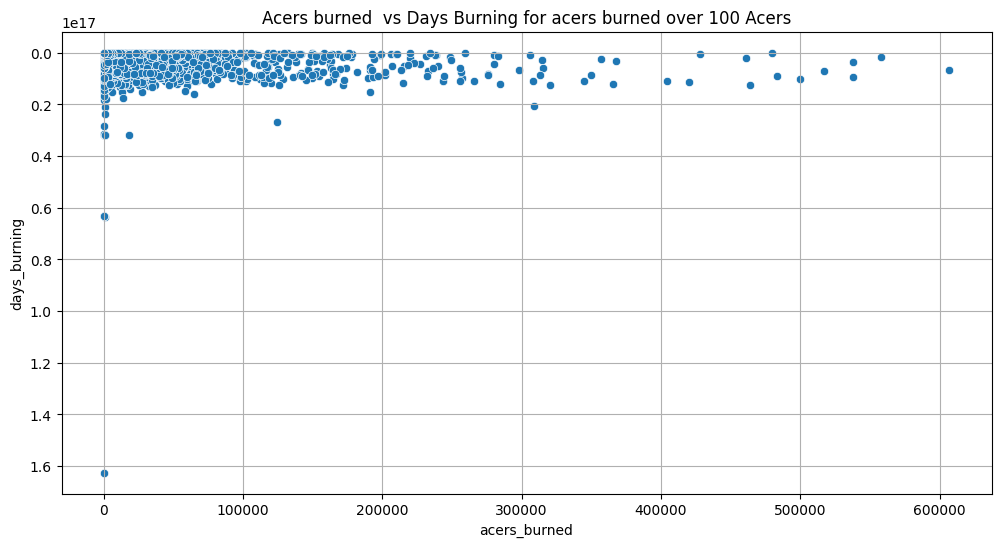

In [32]:
# creating the conditon for the plot
conditiondf = df[df["acers_burned"] > 100]

# plotting the relationship between the acers_burned and days_burning for the over 100 acers 
plt.figure(figsize=(12, 6))
sns.scatterplot(x='acers_burned', y='days_burning', data=conditiondf)
plt.title('Acers burned  vs Days Burning for acers burned over 100 Acers')
plt.xlabel("acers_burned")
plt.ylabel("days_burning")
plt.grid(True)
plt.show()

From the above we can analyze that
Some of the data have the large days_burning but having the acers_burned to almost none. This means that some fire was burning for more days but with less damage. So, the days_burning greater than 0.5 (500 days) could be potential outilers. 

Similarly, there are some points having more acers_burned with less burning days. We can take some of them (for example acers_burned greater than 500,000) as a potential outliers.